# PyTorch Basics in 1 Hour

A beginner-friendly crash course notebook.

## What You Will Learn
- What tensors are  
- How autograd works  
- What gradients are  
- How optimizers work (SGD, Adam, RMSprop)  
- Basic model building with `nn.Module`  
- How training loops work  


In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
%matplotlib inline

print("PyTorch version:", torch.__version__)

PyTorch version: 2.9.1+cpu


## Understanding Tensors

In [5]:
x = torch.tensor([[1.0, 2.0],[3.0, 4.0]])
print(x)
print(x.shape)

tensor([[1., 2.],
        [3., 4.]])
torch.Size([2, 2])


Tensors = PyTorch's version of NumPy arrays but with GPU support.

## Autograd & Gradients

In [6]:
a = torch.tensor([2.0], requires_grad=True)
b = a**3 + 2*a
b.backward()
print(a.grad)

tensor([14.])


Autograd computes gradients automatically.

### Key Terms
**Gradient** – derivative telling how much a change in a parameter affects loss.  
**SGD** – Stochastic Gradient Descent: simplest optimizer.  
**Adam** – Adaptive optimizer combining momentum + RMSprop ideas.  
**RMSprop** – Optimizer scaling learning rate by gradient history.  


## Simple Model Example

In [7]:
class SimpleModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1,1)

    def forward(self,x):
        return self.linear(x)

model = SimpleModel()
print(model)

SimpleModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


## Create Synthetic Data

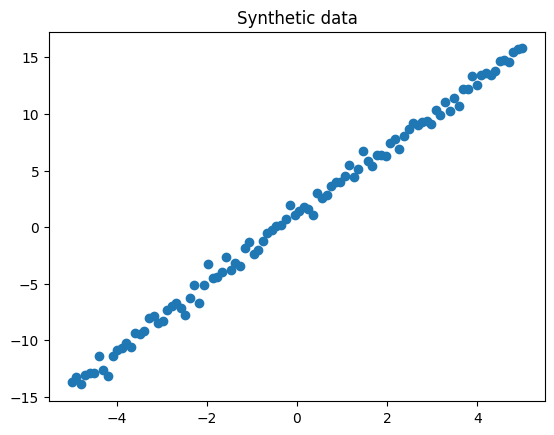

In [8]:
# y = 3x + 1 + noise
X = torch.linspace(-5,5,100).unsqueeze(1)
y = 3*X + 1 + torch.randn_like(X)*0.5

plt.scatter(X, y)
plt.title("Synthetic data")
plt.show()

## Training Loop Demo

In [9]:
optimizer = optim.SGD(model.parameters(), lr=0.01)
loss_fn = nn.MSELoss()

for epoch in range(200):
    pred = model(X)
    loss = loss_fn(pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print("Final loss:", loss.item())

Final loss: 0.3069242537021637


SGD updates parameters based on gradient direction.

## Optimizer Comparison

In [ ]:
for opt_name in ["SGD", "Adam", "RMSprop"]:
    model = SimpleModel()
    if opt_name=="SGD":
        optimizer = optim.SGD(model.parameters(), lr=0.01)
    elif opt_name=="Adam":
        optimizer = optim.Adam(model.parameters(), lr=0.01)
    else:
        optimizer = optim.RMSprop(model.parameters(), lr=0.01)

    for _ in range(200):
        pred = model(X)                 ## create prediction
        loss = loss_fn(pred, y)         ## calculate the loss
        optimizer.zero_grad()           ## clear old calculations
        loss.backward()                 ## do backpropagation
        optimizer.step()                ## take current gradients, calculate the new values

    print(opt_name, "final loss:", loss.item())

SGD final loss: 0.3077976703643799
Adam final loss: 11.22104263305664
RMSprop final loss: 9.840686798095703
